In [1]:
import numpy as np
from matplotlib import cm as cm
from matplotlib import pyplot as plt
import tensorflow as tf
import os

In [2]:
load=0

from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/temp/data/", one_hot=True)
mnist = tf.keras.datasets.mnist
(otrain_data, otrain_labels), (otest_data, otest_labels) = mnist.load_data()
train_data=otrain_data.astype('float32')/255
test_data=otest_data.astype('float32')/255
train_labels = tf.keras.utils.to_categorical(otrain_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(otest_labels, num_classes=10)

In [3]:
n_input=784
n_classes=10

x=tf.placeholder(tf.float32, [None, n_input])
y_exp=tf.placeholder(tf.float32, [None, n_classes])
W=tf.Variable(tf.zeros([n_input,n_classes]))
b1=tf.Variable(tf.zeros([n_classes]))

y_pred=tf.nn.softmax(tf.add(tf.matmul(x,W),b1))
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_exp*tf.log(y_pred),reduction_indices=[1]))

train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [4]:
saver=tf.train.Saver()

sess=tf.InteractiveSession()

if load==0:
    sess.run(tf.global_variables_initializer())
else:
    saver.restore(sess,'/saves/myweights.ckpt')

if load==0:
    for step in range(2000):
        if step%100==0:
            print (step)
        indices = np.random.choice(len(train_data), 32)
        batch_xs, batch_ys =train_data[indices],train_labels[indices]
        sess.run(train_step, feed_dict={x:batch_xs[:].reshape(-1,784),y_exp:batch_ys})
    saver.save(sess,'/saves/myweights.ckpt')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [5]:
correct_prediction = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_exp,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print(sess.run(accuracy,feed_dict={x:test_data[:].reshape(-1,784),y_exp:test_labels}))
out=tf.argmax(y_pred,1)

0.9177


C:\Users\Legion\Anaconda3\envs\Patt\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 1000 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


[4]
[7]
[0]
[0]
[2]
[6]
[6]
[0]
[0]
[9]


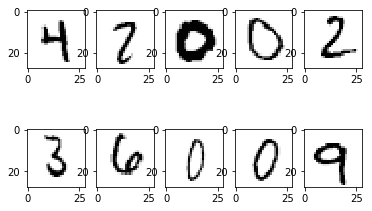

In [6]:
for i in range(10):
    
    ind=np.random.random_integers(1,1000)
    im=test_data[ind]
    print(sess.run(out,{x:im.reshape(-1,784)}))
    im = im.reshape(28,28)
    #print(im)
    plt.subplot(2,5,i+1)
    plt.imshow(im,cmap = cm.Greys)
plt.show()